In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
library = pd.read_csv('../Data/Misc/books.csv')
library

,Cover_Image,Author_Name,Book_Name
0,cover001.png,Michael Crichton,Next
1,cover002.png,Michael Crichton,Prey
2,cover003.png,Michael Crichton,Jurassic Park
3,cover004.png,Michael Crichton,State of Fear
4,cover005.png,Michael Crichton,Timeline
5,cover006.png,Preston and Child,Relic
6,cover007.png,Preston and Child,The Cabinent of Curiosities
7,cover008.png,Preston and Child,Still Life With Crows
8,cover009.png,Bret Easton Ellis,The Informers
9,cover010.png,Bret Easton Ellis,Lunar Park


In [3]:
def get_book_author_name(book_bath):
    return library[library['Cover_Image'] == book_bath]['Author_Name'].values


def get_author_books_from_library(library, author_name):
    return library[library['Author_Name'] == author_name][['Book_Name', 'Cover_Image']].values


def visualize_books(ibrary, author_name):
    author_books = get_author_books_from_library(library, author_name)
    for (book_name, cover_path) in author_books:
        image = cv2.imread('../Data/Images/book_covers/books_library/' + cover_path)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(book_name)
        plt.show()

In [4]:
get_author_books_from_library(library, 'Preston and Child')

array([['Relic', 'cover006.png'],
       ['The Cabinent of Curiosities', 'cover007.png'],
       ['Still Life With Crows', 'cover008.png'],
       ['The Book of the Dead', 'cover015.png'],
       ['Dance of Death', 'cover016.png']], dtype=object)

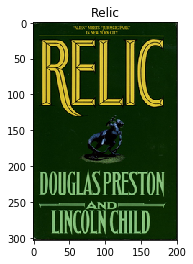

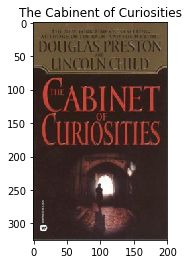

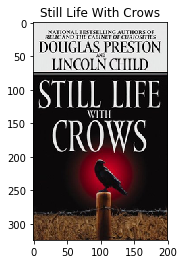

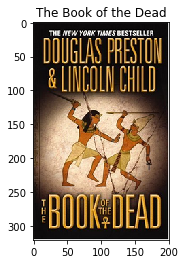

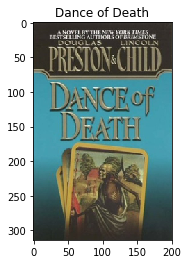

In [5]:
visualize_books(library, 'Preston and Child')

In [6]:
def get_author_books_from_book_cover_template(template_image):
    
    # Library Path
    library_path = '../Data/Images/book_covers/books_library/'
    
    
    # Get Keypoints from template_image
    plt.imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
    plt.title('Template Image')
    plt.show()
    gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(gray,None)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50) 
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    
    
    # get all books from library
    library_books_paths = os.listdir(library_path)

    
    # itereate over books and return matches
    all_book_matches = list()
    print('Searching', end='')
    for book_cover_path in library_books_paths:
        book_cover = cv2.imread(library_path + book_cover_path)
        book_cover_gray = cv2.cvtColor(book_cover, cv2.COLOR_BGR2GRAY)
        kp2, des2 = sift.detectAndCompute(book_cover_gray,None)
        matches = flann.knnMatch(des1,des2,k=2)
        good = [match1.distance for i,(match1,match2) in enumerate(matches) if match1.distance < (0.4 * match2.distance)]
        print('.', end='')
        all_book_matches.append((book_cover_path, len(good)))
        
    
    # get the max match and get book path_name
    matched_book_cover_path, _ = max(all_book_matches, key=lambda x: x[1])
    
    # from library get author_name for the book_path
    author_name = get_book_author_name(matched_book_cover_path)[0]
    
    print("\nSearch is Finished\n")
    print("The Book Author is: " + author_name)
    
    print('\nGetting other books for: ' + author_name)
    
    # visualize_author books
    visualize_books(library, author_name)

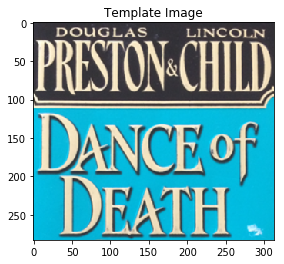

Searching..................................................
Search is Finished

The Book Author is: Preston and Child

Getting other books for: Preston and Child


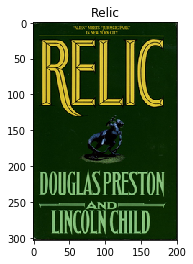

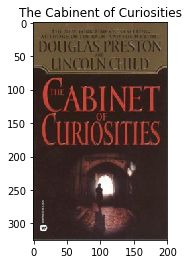

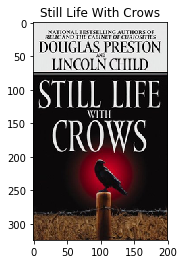

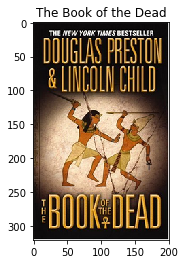

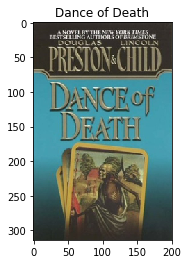

In [7]:
# Testing........
query_image = cv2.imread('../Data/Images/book_covers/query_books/test.PNG')
get_author_books_from_book_cover_template(query_image)